In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


In [338]:
df = pd.read_csv('NDAP_REPORT_6000.csv')
map_df = gpd.read_file('india-polygon.shx')
df.head()

,ROWID,Country,State lgd code,State,District lgd code,District,Sub-District lgd Code,Sub-District,ULB_RLB_Village lgd Code,ULB_RLB_Village,...,Number of female marginal workers in household industry who worked for 0 to 3 months,Number of marginal workers as Other workers who worked for 0 to 3 months,Number of male marginal workers as Other workers who worked for 0 to 3 months,Number of female marginal workers as Other workers who worked for 0 to 3 months,Number of Non workers,Number of male Non workers,Number of female Non workers,Source Year,YearCode,Year
0,585,India,24,GUJARAT,442,BHARUCH,999999,Unknown SubDistricts of India,9802612,Valia (Naldhari) (INA),...,0,0,0,0,0,0,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
1,637,India,24,GUJARAT,459,SURAT,3937,Majura,802631,Surat,...,0,0,0,0,0,0,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
2,1498,India,21,ODISHA,350,CUTTACK,2954,Choudwar,399316,Industrial Area (OG),...,0,0,0,0,1,1,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
3,2062,India,5,UTTARAKHAND,54,RUDRA PRAYAG,290,Ukhimath,800296,Kedarnath,...,0,0,0,0,8,8,0,2011,2011,"Calendar Year (Jan - Dec), 2011"
4,4150,India,1,JAMMU AND KASHMIR,3,BARAMULLA,39,Tangmarg,800009,Municipal Committee Gulmarg Tangmarg,...,0,0,0,0,3,1,2,2011,2011,"Calendar Year (Jan - Dec), 2011"


In [339]:
# Creating the map of India using geopandas, to be used later for visualization
map_df['st_nm'] = map_df['st_nm'].str.upper()
map_df['st_nm'][6] = 'THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU'
map_df = map_df.drop(7 , axis=0).reset_index().drop('index' , axis = 1)


* Indian Census provides basic statistics on state of human resources, demography, culture and economic structure at local, regional and national level.   
* This is further used by Indian government for administration, planning and policy making as well as management and evaluation of various programmes by the Government.  
* Here are some questions that arise after examining the data:


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 1: Total population and the population density of India in 2011, percentage of rural population?




In [340]:
## Total population is just sum of population of each and every district.

area = 3287263
total_population = df['Population'].sum()
rural_population = df[df['Rural or Urban'] == 'Rural']['Population'].sum()
urban_population = df[df['Rural or Urban'] == 'Urban']['Population'].sum()
perc_rural = rural_population/total_population*100

population_density = total_population/area

## <center>  Total population :   <font color = 'green'> 1.210 Billion  </font>  </center>
## <center>  Rural population  :   <font color = 'green'> 833.7 Million (68.85%) </font>  </center>
## <center> Population density : <font color = 'green'> 368.35 people per square kilometer </font> </center>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 2: Variation of total population and population density across each states

In [341]:
states_list = df['State'].unique()
state_area = pd.read_excel('state_area.ods').set_index('State Name').T.to_dict('list')

state_pop = dict()

state_info = pd.DataFrame(columns=['State' , 'Population' , 'Population density'])

i = 0
for state in states_list:
    state_pop[state] = df[df['State'] == state]['Population'].sum()
    state_info.loc[i] = [state , state_pop[state] , state_pop[state]/state_area[state][0]]
    i = i+1

# sorting and styling
state_info = state_info.sort_values('Population' , ascending=False).reset_index().drop('index' , axis = 1)
state_info.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

,State,Population,Population density
0,UTTAR PRADESH,199812341,829.344622
1,MAHARASHTRA,112374333,365.192023
2,BIHAR,104099452,1105.523953
3,WEST BENGAL,91276115,1028.440091
4,MADHYA PRADESH,72641665,235.662103
5,TAMIL NADU,72147030,554.729659
6,RAJASTHAN,68548437,211.413300
7,KARNATAKA,61095297,318.551428
8,GUJARAT,60443083,308.345320
9,ANDHRA PRADESH,49577103,304.213729


<Axes: title={'center': 'State wise population'}>

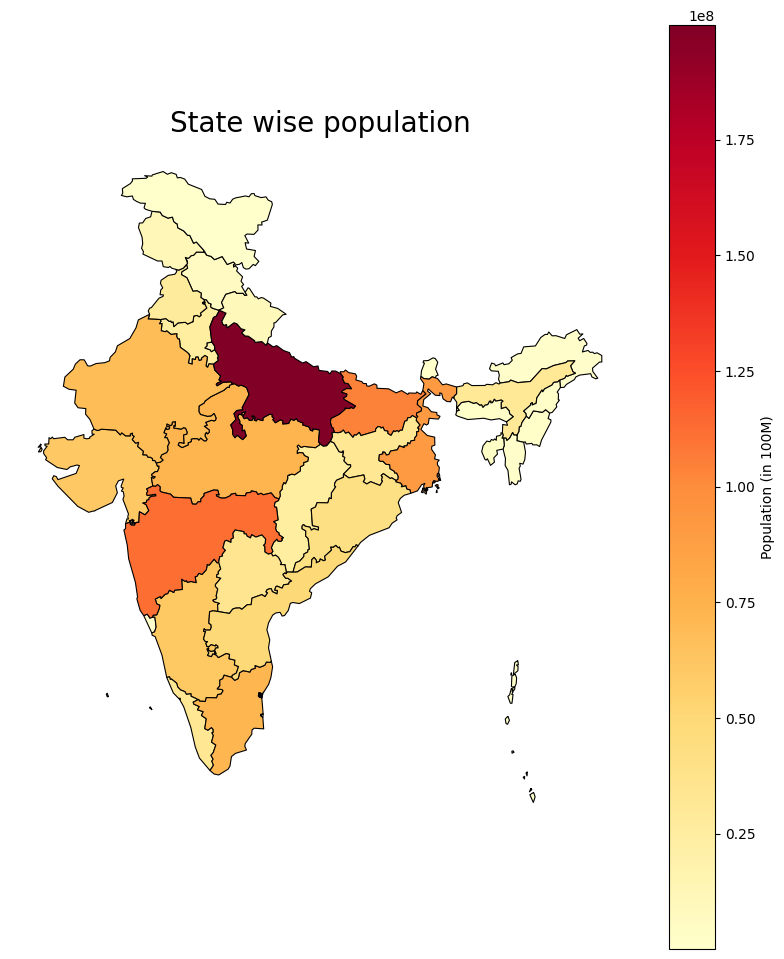

In [342]:
merged = map_df.set_index('st_nm').join(state_info.set_index('State'))
merged.drop('id' , axis = 1)
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 12))
ax.axis('off')
ax.set_title('State wise population', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
merged.plot(column='Population',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Population (in 100M)"})

## <center>  Highest population :   <font color = 'green'> Uttar Pradesh<font color = 'orange'> (199M)</font> </font>, Lowest population : <font color = 'green'> Lakshadweep <font color = 'orange'> (64473)</font></font></center> 
## <center>  Highest population density :   <font color = 'green'> Delhi<font color = 'orange'> (11312.6)</font> </font>, Lowest population density : <font color = 'green'> Ladakh<font color = 'orange'> (2.08)</font> </font></center> 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 3: Literacy rate in India, it's variation across each state, how does it differ by gender in Rural and Urban areas?

In [343]:
literacy_rate = df['Literate population '].sum()/(total_population - df['Population in the age group 0 to 6 years'].sum())*100
literacy_rate_urban = (df[df['Rural or Urban'] == 'Urban']['Literate population ']).sum()/(df[df['Rural or Urban'] == 'Urban']['Population'].sum() - df[df['Rural or Urban'] == 'Urban']['Population in the age group 0 to 6 years'].sum())*100
literacy_rate_urban_male = (df[df['Rural or Urban'] == 'Urban']['Male literate population']).sum()/(df[df['Rural or Urban'] == 'Urban']['Male population'].sum() - df[df['Rural or Urban'] == 'Urban']['Male Population in the age group 0 to 6 years'].sum())*100
literacy_rate_urban_female = (df[df['Rural or Urban'] == 'Urban']['Female literate population ']).sum()/(df[df['Rural or Urban'] == 'Urban']['Female population'].sum() - df[df['Rural or Urban'] == 'Urban']['Female Population in the age group 0 to 6 years'].sum())*100
literacy_rate_rural = (df[df['Rural or Urban'] == 'Rural']['Literate population ']).sum()/(df[df['Rural or Urban'] == 'Rural']['Population'].sum() - df[df['Rural or Urban'] == 'Rural']['Population in the age group 0 to 6 years'].sum())*100
literacy_rate_rural_male = (df[df['Rural or Urban'] == 'Rural']['Male literate population']).sum()/(df[df['Rural or Urban'] == 'Rural']['Male population'].sum() - df[df['Rural or Urban'] == 'Rural']['Male Population in the age group 0 to 6 years'].sum())*100
literacy_rate_rural_female = (df[df['Rural or Urban'] == 'Rural']['Female literate population ']).sum()/(df[df['Rural or Urban'] == 'Rural']['Female population'].sum() - df[df['Rural or Urban'] == 'Rural']['Female Population in the age group 0 to 6 years'].sum())*100

state_literacy = pd.DataFrame(columns=['State' ,'Male literacy rate (Urban)','Female literacy rate (Urban)','Literacy rate (Urban)','Male literacy rate (Rural)','Female literacy rate (Rural)','Literacy rate (Rural)', 'Average male literacy rate' , 'Average female literacy rate' , 'Total literacy rate' , 'Gender gap'])

i = 0
for state in states_list:
    state_male_literacy = (df[df['State'] == state]['Male literate population'].sum())/(df[df['State'] == state]['Male population'].sum() - df[df['State'] == state]['Male Population in the age group 0 to 6 years'].sum())*100
    state_female_literacy = (df[df['State'] == state]['Female literate population '].sum())/(df[df['State'] == state]['Female population'].sum() - df[df['State'] == state]['Female Population in the age group 0 to 6 years'].sum())*100
    state_literacy_total = (df[df['State'] == state]['Literate population '].sum())/(df[df['State'] == state]['Population'].sum() - df[df['State'] == state]['Population in the age group 0 to 6 years'].sum())*100

    state_male_literacy_rural = (df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Male literate population'].sum())/(df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Male population'].sum() - df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Male Population in the age group 0 to 6 years'].sum())*100
    state_female_literacy_rural = (df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Female literate population '].sum())/(df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Female population'].sum() - df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Female Population in the age group 0 to 6 years'].sum())*100
    state_literacy_total_rural = (df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Literate population '].sum())/(df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Population'].sum() - df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Population in the age group 0 to 6 years'].sum())*100

    state_male_literacy_urban = (df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Male literate population'].sum())/(df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Male population'].sum() - df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Male Population in the age group 0 to 6 years'].sum())*100
    state_female_literacy_urban = (df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Female literate population '].sum())/(df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Female population'].sum() - df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Female Population in the age group 0 to 6 years'].sum())*100
    state_literacy_total_urban = (df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Literate population '].sum())/(df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Population'].sum() - df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Population in the age group 0 to 6 years'].sum())*100

    state_literacy.loc[i] = [state , state_male_literacy_urban , state_female_literacy_urban ,state_literacy_total_urban, state_male_literacy_rural , state_female_literacy_rural ,state_literacy_total_rural, state_male_literacy , state_female_literacy , state_literacy_total , state_male_literacy-state_female_literacy]
    i = i+1
state_literacy = state_literacy.sort_values('Total literacy rate', ascending=False).reset_index().drop('index' , axis = 1)
state_literacy.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])


,State,Male literacy rate (Urban),Female literacy rate (Urban),Literacy rate (Urban),Male literacy rate (Rural),Female literacy rate (Rural),Literacy rate (Rural),Average male literacy rate,Average female literacy rate,Total literacy rate,Gender gap
0,KERALA,96.953401,93.437777,95.106056,95.351226,90.811963,92.981927,96.112922,92.069530,93.995672,4.043392
1,LAKSHADWEEP,95.836409,87.794501,91.920609,94.533609,88.496602,91.578777,95.556844,87.946365,91.846971,7.610479
2,MIZORAM,97.983734,97.271542,97.627380,88.158595,79.814643,84.095165,93.348135,89.267526,91.331736,4.080608
3,GOA,93.205057,86.556897,89.953530,91.714177,81.633894,86.649843,92.649546,84.660857,88.702096,7.988689
4,TRIPURA,95.512005,91.376269,93.468992,90.067232,79.490955,84.901636,91.526353,82.728343,87.216032,8.798010
5,ANDAMAN AND NICOBAR ISLANDS,93.109679,86.627897,90.103468,88.525200,79.852907,84.500992,90.266940,82.425350,86.628908,7.841590
6,DELHI,90.976923,80.949301,86.318102,89.370046,73.101803,81.859982,90.937306,80.758060,86.208779,10.179246
7,CHANDIGARH,90.111675,81.382323,86.193494,85.768093,73.165533,80.745115,89.986792,81.189050,86.049597,8.797742
8,PUDUCHERRY,93.030640,84.166126,88.490193,87.438774,73.017242,80.095014,91.264698,80.673939,85.849995,10.590759
9,HIMACHAL PRADESH,93.424610,88.371436,91.102143,89.053115,74.618901,81.851535,89.532184,75.927152,82.799098,13.605032


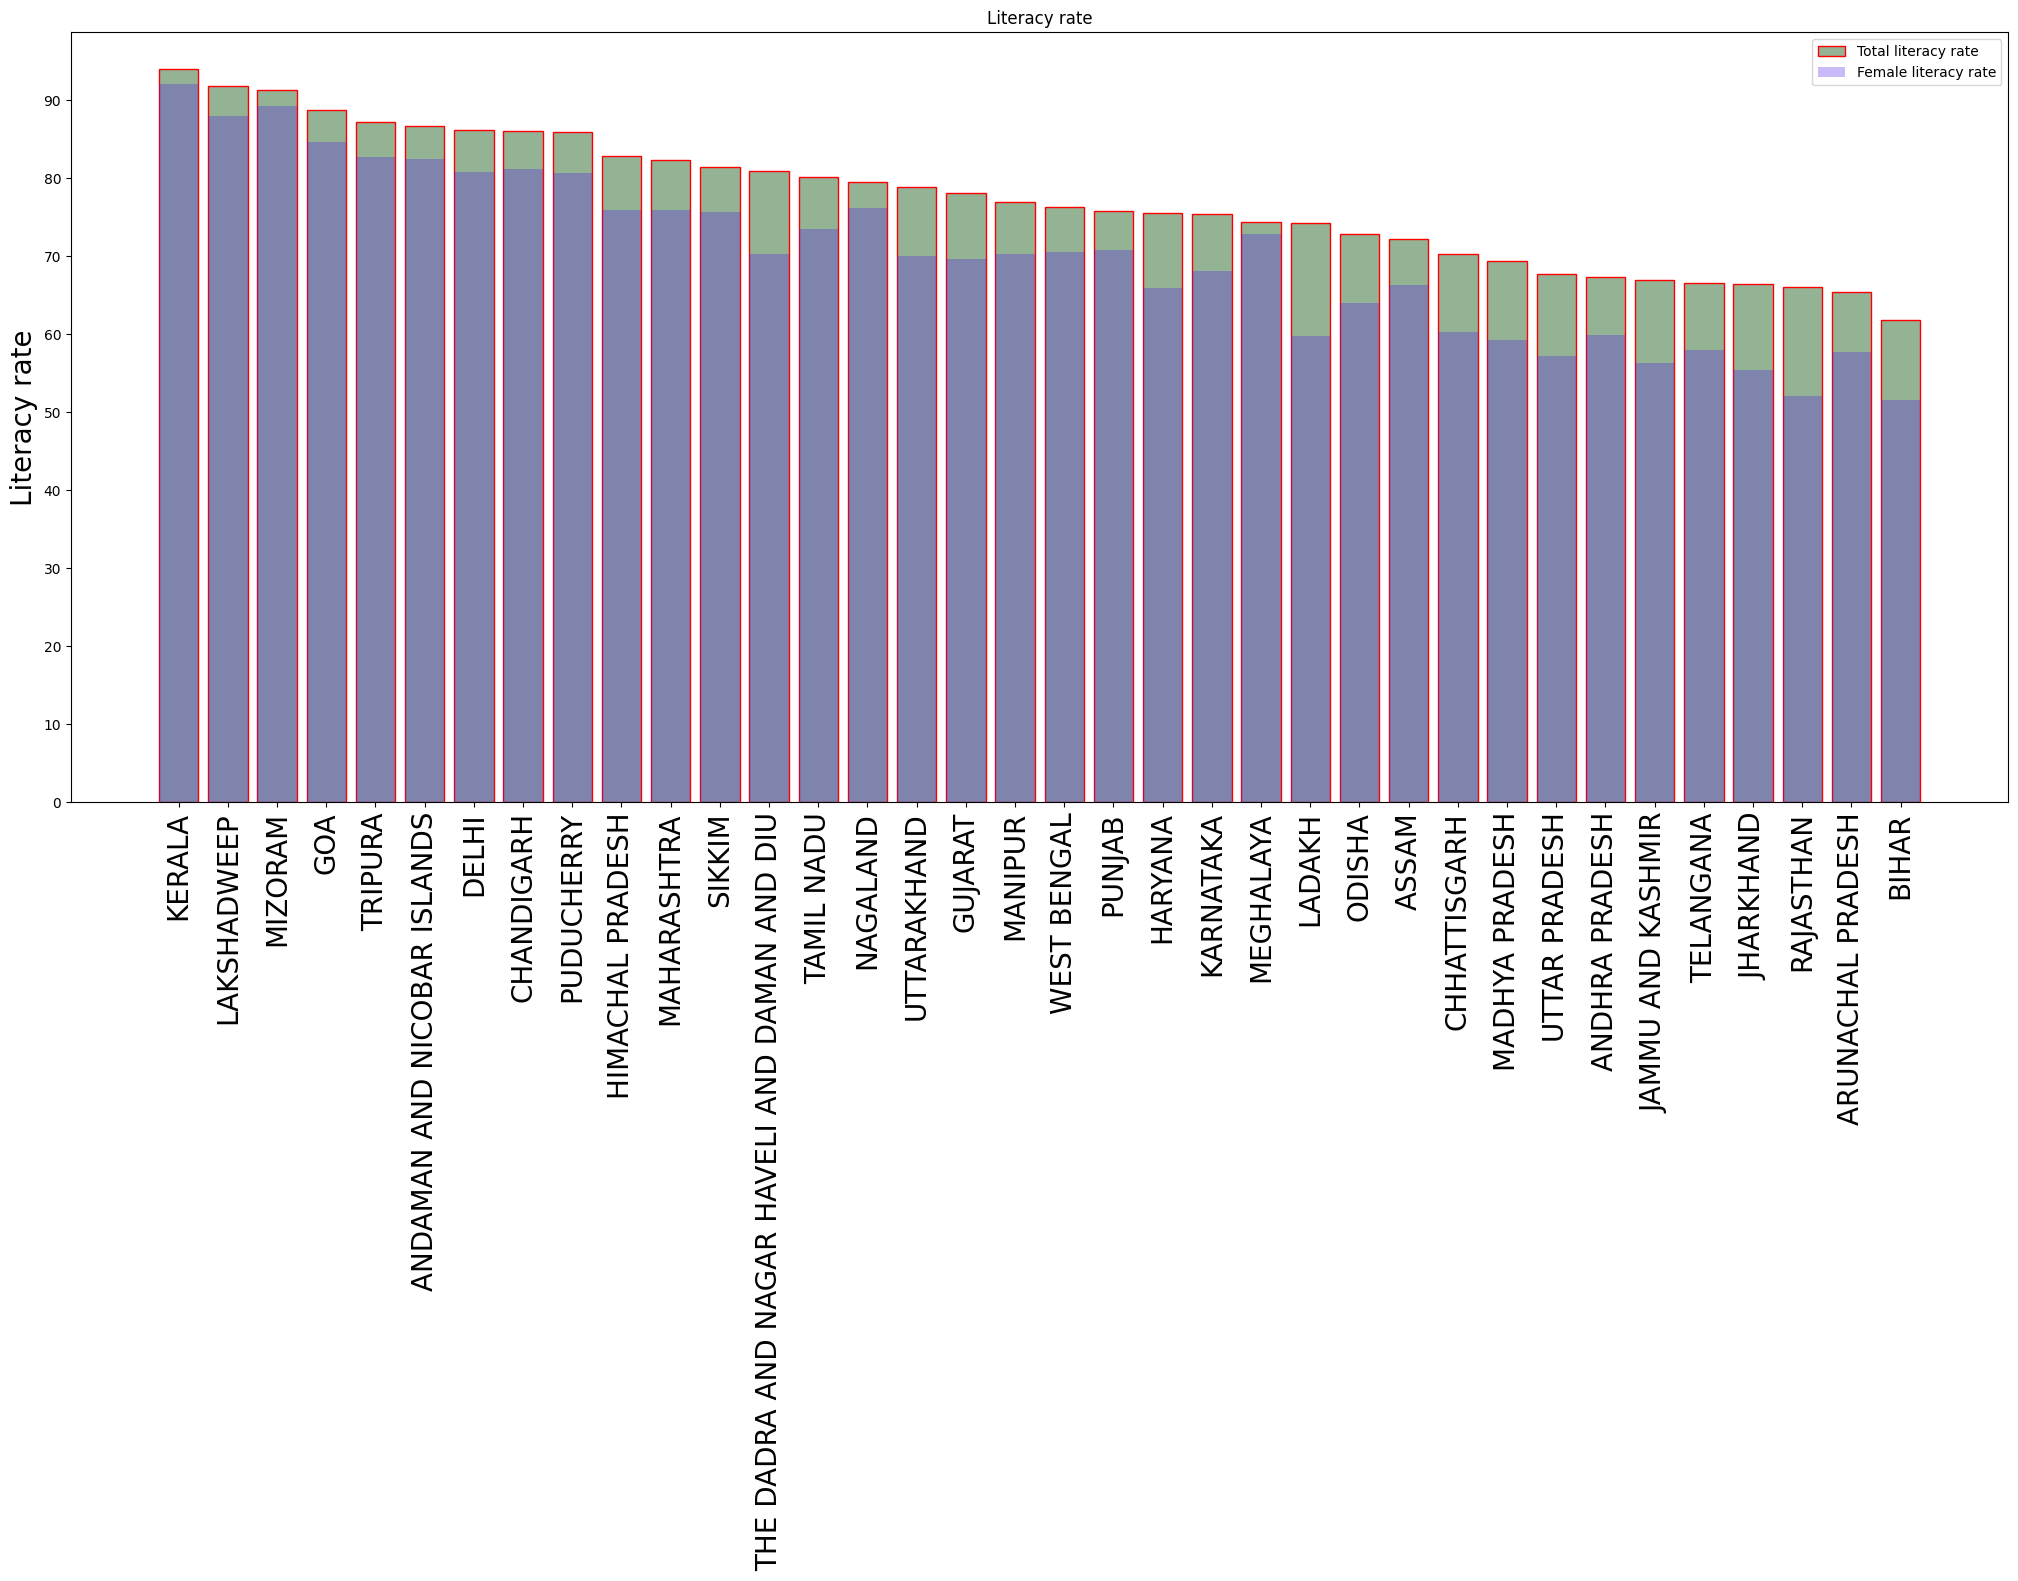

In [344]:
fig = plt.figure(figsize=(25,10))
plt.title('Literacy rate')
plt.ylabel('Literacy rate' , fontsize = 20)
plt.xticks( np.linspace(0,35,36 , endpoint=True) , state_literacy['State'] , rotation = 'vertical', fontsize = 20)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110])
plt.bar( np.linspace(0,35,36 , endpoint=True) , state_literacy['Total literacy rate'] , label = 'Total literacy rate' , color = (0.3,0.5,0.3,0.6) , edgecolor = 'red')
plt.bar( np.linspace(0,35,36 , endpoint=True) ,state_literacy['Average female literacy rate'] , label = 'Female literacy rate' , color = (0.3,0.1,0.9,0.3))
plt.legend()

## The green bar in this plot is also the extent of gender literacy gap

## <center>  Urban literacy :   <font color = 'green'><font color = 'orange'> (84.10%)</font> </font>, Rural literacy : <font color = 'green'><font color = 'orange'> (67.76%)</font> </font></center>
## <center>  Urban literacy female :   <font color = 'green'><font color = 'orange'> (79.11%)</font> </font>, Rural literacy female: <font color = 'green'><font color = 'orange'> (57.92%)</font> </font></center>
 ## <center>  Urban mean gender gap :   <font color = 'green'><font color = 'orange'> (9.33%)</font> </font>, Rural mean gender gap : <font color = 'green'><font color = 'orange'> (16.02%)</font> </font></center>

## <center>  Highest literacy gap :   <font color = 'green'> Rajasthan <font color = 'orange'> (27.01%)</font> </font>, Lowest literacy gap : <font color = 'green'> Meghalaya <font color = 'orange'> (3.07%)</font></font></center>

## <center>  Highest literacy :   <font color = 'green'> Kerala <font color = 'orange'> (96.11%)</font> </font>, Lowest literacy : <font color = 'green'> Bihar <font color = 'orange'> (61.69%)</font> </font></center> 


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 4: Sex ratio in India and it's variation across each states

In [345]:
total_female_population = df['Female population'].sum()
perc_female = total_female_population/total_population*100

total_male_population = df['Male population'].sum()
perc_male = total_male_population/total_population*100

state_sex = pd.DataFrame(columns=['State' , 'Percentage male population' , 'Percentage female population' , 'Female per 1000 male'])

i = 0
for state in states_list:
    state_pop = df[df['State'] == state]['Population'].sum()
    per_male = df[df['State'] == state]['Male population'].sum()/state_pop*100
    per_female = df[df['State'] == state]['Female population'].sum()/state_pop*100
    state_sex.loc[i] = [state , per_male , per_female, per_female/per_male*1000]
    i = i+1
state_sex['Female per 1000 male'] = [int(i) for i in state_sex['Female per 1000 male']]
state_sex = state_sex.sort_values('Female per 1000 male', ascending=False).reset_index().drop('index' , axis = 1)
state_sex.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])





,State,Percentage male population,Percentage female population,Female per 1000 male
0,KERALA,47.977557,52.022443,1084
1,PUDUCHERRY,49.081255,50.918745,1037
2,TAMIL NADU,50.089345,49.910655,996
3,ANDHRA PRADESH,50.084639,49.915361,996
4,CHHATTISGARH,50.236037,49.763963,990
5,MEGHALAYA,50.282704,49.717296,988
6,TELANGANA,50.313670,49.686330,987
7,MANIPUR,50.374292,49.625708,985
8,ODISHA,50.536490,49.463510,978
9,MIZORAM,50.613923,49.386077,975


<BarContainer object of 36 artists>

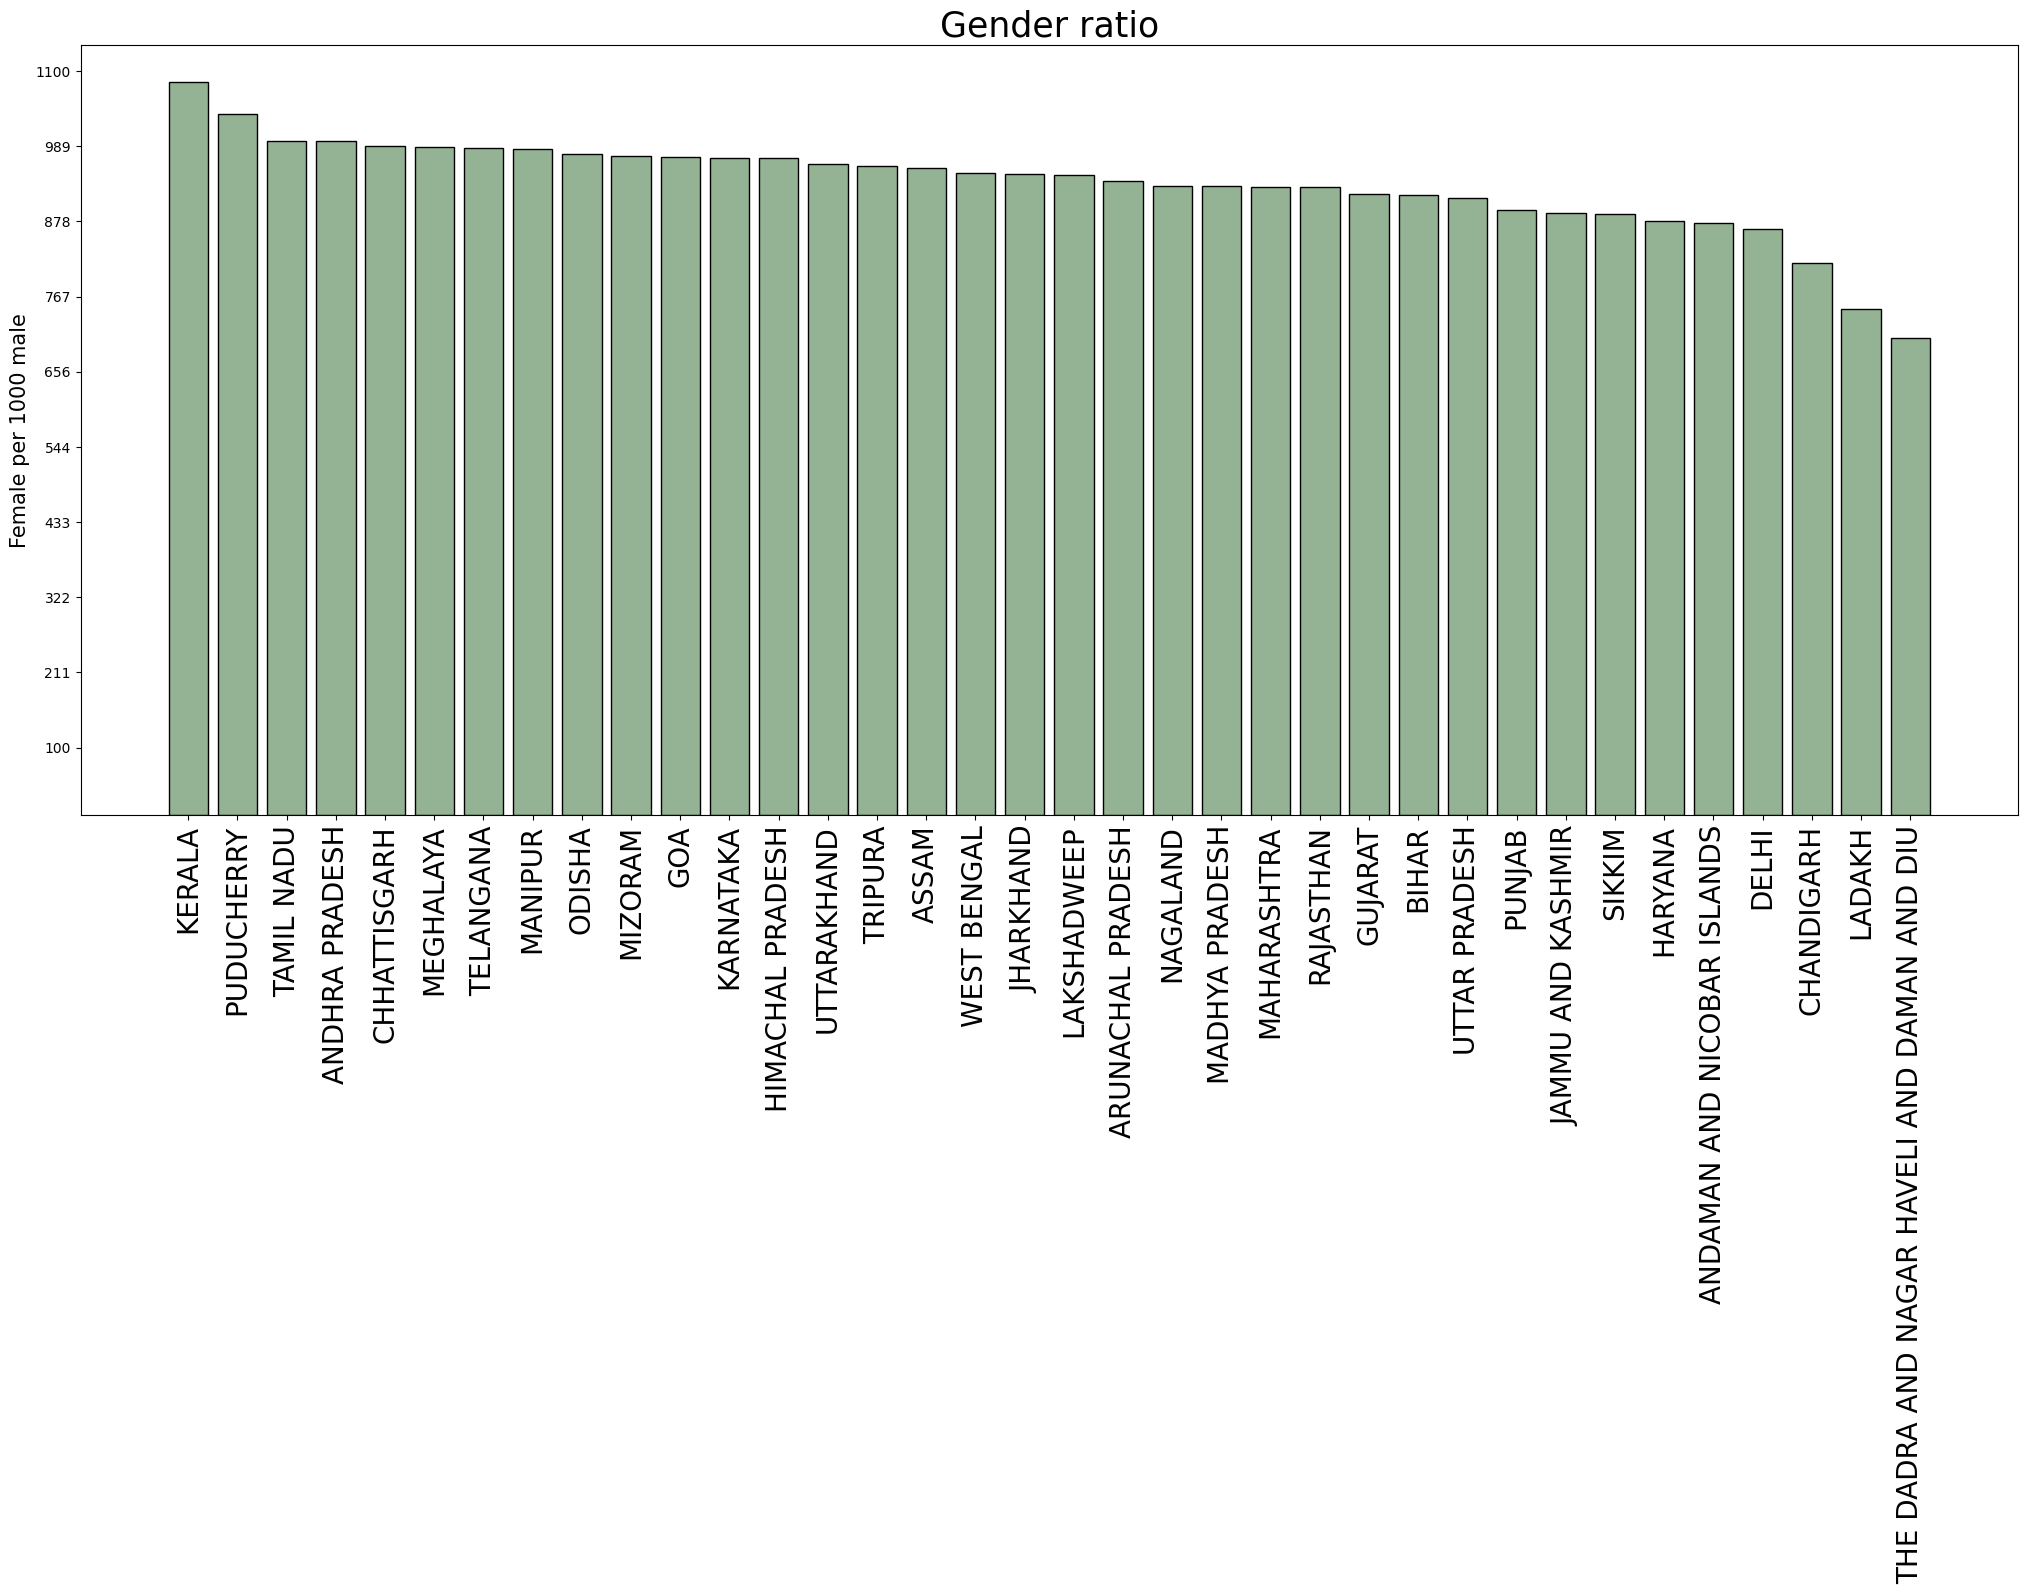

In [346]:
fig = plt.figure(figsize=(25,10))
plt.title('Gender ratio' , fontsize = 25)
plt.ylabel('Female per 1000 male' , fontsize = 15)
plt.xticks( np.linspace(0,35,36 , endpoint=True) , state_sex['State'] , rotation = 'vertical' , fontsize = 20 )
plt.yticks(np.linspace(100,1100 , 10 , endpoint=True))
plt.bar(state_sex['State'] , state_sex['Female per 1000 male'] , color = (0.3,0.5,0.3,0.6) , edgecolor = 'black')

## <center>  Highest sex ratio :   <font color = 'green'> Kerala <font color = 'orange'> (1084 female per 1000 male)</font> </font>  </center> 
## <center> Lowest sex ratio : <font color = 'green'> Daman and Diu <font color = 'orange'> (705 female per 1000 male)</font> </font></center> 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 5: People per household in rural and urban areas across different states 


In [347]:
household = pd.DataFrame(columns=['State', 'Rural' , 'Urban' , 'Average'])
avg_people_per_household_total = total_population/df['Households'].sum()

i = 0
for state in states_list:
    people_per_household_rural = df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Population'].sum()/df[(df['State'] == state) & (df['Rural or Urban'] == 'Rural')]['Households'].sum()
    people_per_household_urban = df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Population'].sum()/df[(df['State'] == state) & (df['Rural or Urban'] == 'Urban')]['Households'].sum()
    people_per_household_avg = df[(df['State'] == state)]['Population'].sum()/df[(df['State'] == state)]['Households'].sum()
    household.loc[i] = [state , people_per_household_rural , people_per_household_urban, people_per_household_avg]
    i = i+1

household = household.sort_values('Average', ascending=False).reset_index().drop('index' , axis = 1)
household.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])


,State,Rural,Urban,Average
0,LADAKH,6.836275,6.743774,6.815142
1,UTTAR PRADESH,6.046781,5.732354,5.973814
2,JAMMU AND KASHMIR,5.843334,6.051505,5.899103
3,LAKSHADWEEP,5.218081,5.678249,5.570503
4,BIHAR,5.475999,5.733869,5.503957
5,MEGHALAYA,5.507635,5.068263,5.413448
6,RAJASTHAN,5.424000,5.300621,5.392782
7,JHARKHAND,5.297762,5.200602,5.274067
8,HARYANA,5.424009,4.874991,5.219009
9,MANIPUR,5.243930,4.840193,5.119204


## <center>  Average people per household:   <font color = 'green'> <font color = 'orange'> 4.853</font> </font>  </center> 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 6: Percentage of schedule tribe and schedule caste population

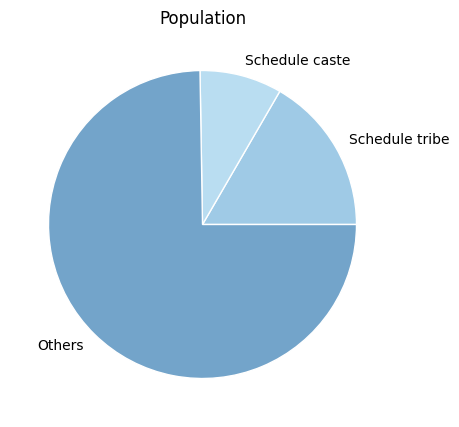

In [348]:
schedule_tribe_population_percentage = df['Scheduled Tribe population'].sum()/total_population*100
schedule_caste_population_percentage = df['Scheduled Caste population'].sum()/total_population*100



fig = plt.figure(figsize=(5,5))
plt.title('Population')
plt.pie([16.63 , 8.63 , 100-16.63-8.63] , labels=['Schedule tribe' , 'Schedule caste' , 'Others'] , colors = ["#9FCAE6","#B9DDF1", "#73A4CA"] ,  wedgeprops = {"linewidth": 1, "edgecolor": "white"});



## <center>  Percentage of schedule tribe population:   <font color = 'green'><font color = 'orange'> 16.63 %</font> </font>  </center> 
## <center>  Percentage of schedule caste population:   <font color = 'green'><font color = 'orange'> 8.63 %</font> </font>  </center> 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 7: Working population and percentage of male and female population working in rural and urban areas

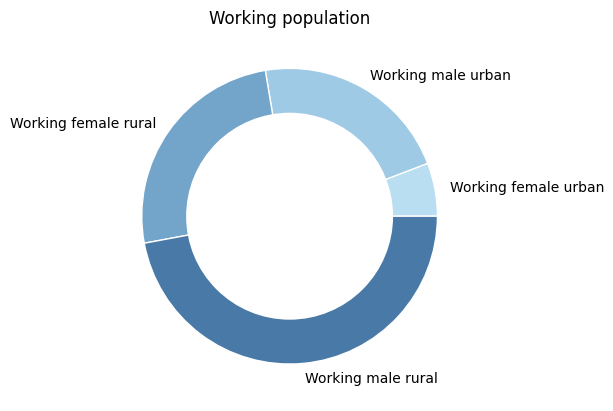

In [349]:
total_working_population = df['Working population'].sum()
working_male_urban = df[df['Rural or Urban'] == 'Urban']['Male working population'].sum()/total_working_population
working_female_urban = df[df['Rural or Urban'] == 'Urban']['Female Woking population'].sum()/total_working_population
working_male_rural = df[df['Rural or Urban'] == 'Rural']['Male working population'].sum()/total_working_population
working_female_rural = df[df['Rural or Urban'] == 'Rural']['Female Woking population'].sum()/total_working_population

plt.title('Working population')
plt.legend
plt.pie([working_female_urban  , working_male_urban ,working_female_rural, working_male_rural] ,labels = ['Working female urban' , 'Working male urban','Working female rural', 'Working male rural'] ,colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7"] ,  wedgeprops = {"linewidth": 1, "edgecolor": "white"});
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


## <center>  Out of total working population of the country, </center>
## <center>  Percentage of female workers in urban areas:  <font color = 'green'><font color = 'orange'> 5.81%</font> </font>  </center> 
## <center>  Percentage of male workers in urban areas:  <font color = 'green'><font color = 'orange'> 21.81%</font> </font>  </center> 
## <center>  Percentage of female workers in rural areas:  <font color = 'green'><font color = 'orange'> 25.29%</font> </font>  </center> 
## <center>  Percentage of male workers in rural areas:  <font color = 'green'><font color = 'orange'> 47.07%</font> </font>  </center> 

### <center> <font color = 'green'> Interesting stastic : More female workers in rural areas then male workers in urban areas </font> </center>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 8: Distribution of main and marginal workers

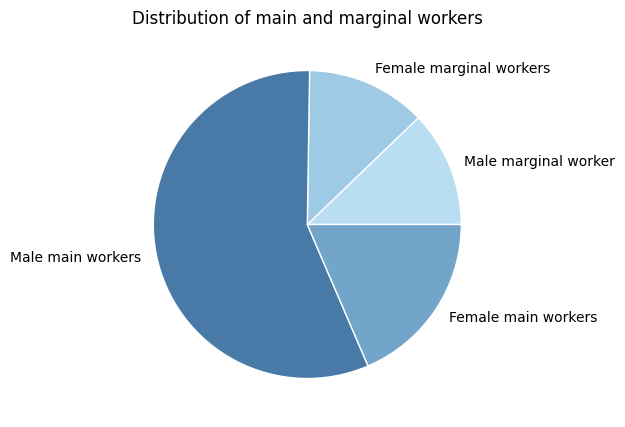

In [350]:
main_workers_male = df['Number of male main workers'].sum()/total_working_population
main_workers_female = df['Number of female main worker'].sum()/total_working_population
marginal_workers_male = df['Number of male marginal workers'].sum()/total_working_population
marginal_workers_female = df['Number of female marginal workers'].sum()/total_working_population
plt.figure(figsize=(5,5))
plt.title('Distribution of main and marginal workers')
plt.pie([marginal_workers_male , marginal_workers_female , main_workers_male , main_workers_female] , labels = ['Male marginal worker' , 'Female marginal workers' , 'Male main workers' , 'Female main workers'] , colors = ["#B9DDF1", "#9FCAE6", "#497AA7", "#73A4CA"] ,  wedgeprops = {"linewidth": 1, "edgecolor": "white"});

In [351]:
main_workers_male , main_workers_female , marginal_workers_male  ,marginal_workers_female 

(0.5669594618542707,
 0.18542739733236338,
 0.12187329709715165,
 0.1257398437162143)

## <center>  Out of total working population of the country, </center>
## <center>  Female marginal workers:  <font color = 'green'><font color = 'orange'> 56.69%</font> </font>  </center> 
## <center>  Male marginal workers: <font color = 'green'><font color = 'orange'> 18.54%</font> </font>  </center> 
## <center>  Female main workers:  <font color = 'green'><font color = 'orange'> 12.18%</font> </font>  </center> 
## <center>  Male main workers:  <font color = 'green'><font color = 'orange'> 12.57%</font> </font>  </center> 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 9: General occupation comparison between rural and urban areas

In [352]:
cultivators_rural = df[df['Rural or Urban'] == 'Rural']['Number of main workers as cultivators'].sum() + df[df['Rural or Urban'] == 'Rural']['Number of marginal workers as cultivators'].sum()
cultivators_urban = df[df['Rural or Urban'] == 'Urban']['Number of main workers as cultivators'].sum() + df[df['Rural or Urban'] == 'Urban']['Number of marginal workers as cultivators'].sum()
agriculture_rural = df[df['Rural or Urban'] == 'Rural']['Number of main workers as agricultural labourers'].sum() + df[df['Rural or Urban'] == 'Rural']['Number of marginal workers as agricultural labourers'].sum()
agriculture_urban = df[df['Rural or Urban'] == 'Urban']['Number of main workers as agricultural labourers'].sum() + df[df['Rural or Urban'] == 'Urban']['Number of marginal workers as agricultural labourers'].sum()
household_rural = df[df['Rural or Urban'] == 'Rural']['Number of main workers in the household industry'].sum() + df[df['Rural or Urban'] == 'Rural']['Number of marginal workers in the household industry'].sum()
household_urban = df[df['Rural or Urban'] == 'Urban']['Number of main workers in the household industry'].sum() + df[df['Rural or Urban'] == 'Urban']['Number of marginal workers in the household industry'].sum()
others_rural = df[df['Rural or Urban'] == 'Rural']['Number of  main workers as Other workers'].sum() + df[df['Rural or Urban'] == 'Rural']['Number of marginal workers as Other workers'].sum()
others_urban = df[df['Rural or Urban'] == 'Urban']['Number of  main workers as Other workers'].sum() + df[df['Rural or Urban'] == 'Urban']['Number of marginal workers as Other workers'].sum()








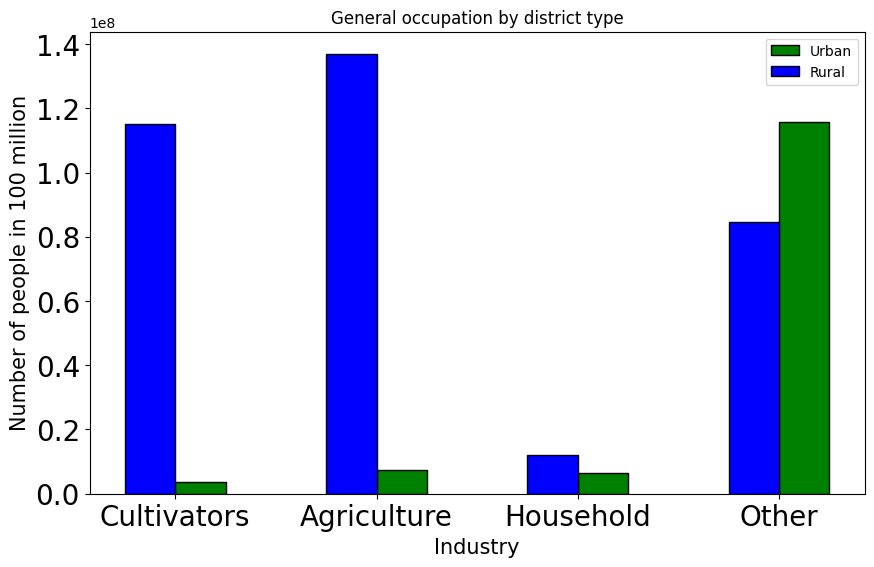

In [353]:
plt.figure(figsize=(10,6))
plt.title('General occupation by district type')
plt.ylabel('Number of people in 100 million' , size = 15)
plt.xlabel('Industry' , size = 15)
plt.xticks([0.125,1.125,2.125,3.125] , ['Cultivators' , 'Agriculture' , 'Household' , 'Other'] , size = 20)
plt.yticks(size = 20)
plt.bar([0.25,1.25,2.25,3.25] , [cultivators_urban , agriculture_urban ,household_urban , others_urban ] , label = 'Urban' ,  color = 'green' , edgecolor = 'black' , width = 0.25)
plt.bar([0,1,2,3] , [cultivators_rural , agriculture_rural ,household_rural , others_rural ] , color = 'blue' , label = 'Rural', edgecolor = 'black' , width = 0.25)
plt.legend()

## <center> Rural population dominating in the cultivation , agriculture , and household industries </center>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 10: Occupation comparison between male and female population

In [354]:
agriculture_male = df['Number of male main workers as agricultural labourers'].sum() + df['Number of marginal workers as agricultural labourers'].sum()
agriculture_female = df['Number of female main workers as agricultural labourers'].sum() + df['Number of female marginal workers as agricultural labourers'].sum()
cultivators_male = df['Number of male main workers as cultivators'].sum()  +df['Number of male marginal workers as cultivators'].sum()
cultivators_female = df['Number of female main workers as cultivators'].sum()  +df['Number of female marginal workers as cultivators'].sum()
household_male = df['Number of male main workers in the household industry'].sum() + df['Number of male marginal workers in the household industry'].sum()
household_female = df['Number of female main workers in the household industry'].sum() + df['Number of female marginal workers in the household industry'].sum()
others_male = df['Number of male main workers as Other workers'].sum() + df['Number of male marginal workers as Other workers'].sum()
others_female = df['Number of female main workers as Other workers'].sum() + df['Number of female marginal workers as Other workers'].sum()



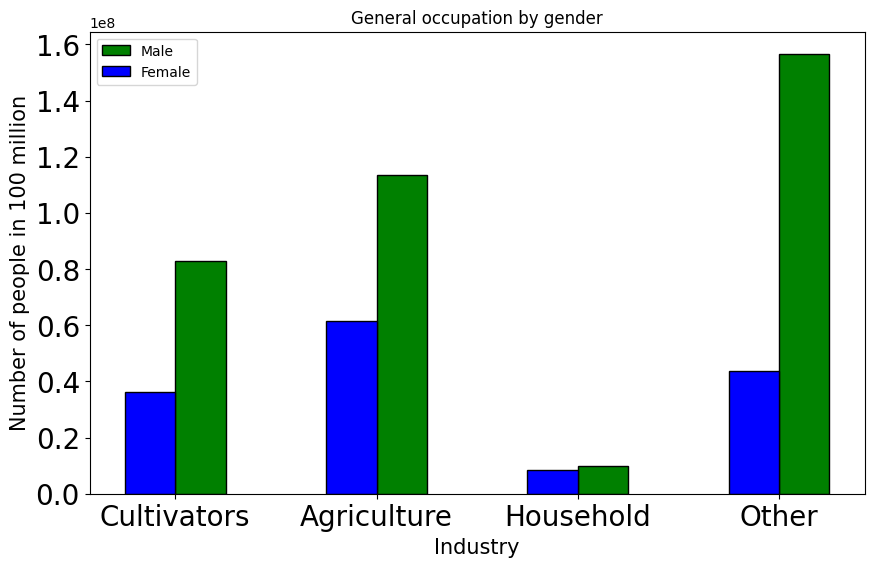

In [355]:
plt.figure(figsize=(10,6))
plt.title('General occupation by gender')
plt.ylabel('Number of people in 100 million' , size = 15)
plt.xlabel('Industry' , size = 15)
plt.xticks([0.125,1.125,2.125,3.125] , ['Cultivators' , 'Agriculture' , 'Household' , 'Other'] , size = 20)
plt.yticks(size = 20)
plt.bar([0.25,1.25,2.25,3.25] , [cultivators_male , agriculture_male ,household_male , others_male ] , label = 'Male' ,  color = 'green' , edgecolor = 'black' , width = 0.25)
plt.bar([0,1,2,3] , [cultivators_female , agriculture_female ,household_female , others_female ] , color = 'blue' , label = 'Female', edgecolor = 'black' , width = 0.25)
plt.legend()


## <center> Main female occupation : <font color = 'yellow'>Agriculture</font> </center>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Now to relate literacy rates of districts with the demographics of the data, we will use:
* ### Population density of districts - Generally, literacy rates are lower in more populated districts. Source : https://en.wikipedia.org/wiki/List_of_districts_in_India
* ### Gender ratio of districts - Literacy rates are usually lower in districts with uneven gender ratios. I would get the male-female ratio for each district from the census
* ### Rural vs Urban population - Literacy tends to be lower in predominantly rural districts. I would get the rural and urban population percentages for each district from the census.
* ### Income levels - Literacy is usually correlated with income and economic well-being. I would need to get district-wise income and poverty data. Sources for this can be:
* ### Occupation - People working in the agriculture, cultivation and household industry do not require higher education or education at all. We will try to correlate the number of people working in these industries and their literacy rates

## **Note: I have used only 12 states because it was not possible to pull density as well as GDP for each and every state and district**
A lot of cleaning need to be done because of spelling errors either in census data or data available on niti, making it incompatiable to merge columns directly. A lot of manual work here


In [356]:
## removing extra columns from the downloaded data 

def fixdf(df):
    df.reset_index(inplace=True)
    df.drop(['index' , 'DESCRIPTION' , 'YEAR'] , inplace= True, axis =1)

    newdf = pd.DataFrame(columns=['District' , 'GDP (Crores)'])
    i = 0
    for x in df.columns:
        newdf.loc[i] = [x, df[x][0]]
        i = i+1
    return newdf

In [357]:
## importing GDP data of each state 

west_bengal = pd.read_csv('DistrictGDPWestBengal_r1.csv')
west_bengal = west_bengal.drop([0,1,2,3,4,5,7,8,9,10,11,12] , axis = 0)
west_bengal.columns = [x.upper() for x in west_bengal.columns]
west_bengal = fixdf(west_bengal)

karnataka = pd.read_csv('Districtwise_GDP_and_growth_rate_based_at_current_price_2004-05_Karnataka.csv')
karnataka = karnataka.drop([0,1,2,4,5,6] , axis = 0)
karnataka.columns = [x.upper() for x in karnataka.columns]
karnataka = fixdf(karnataka)

odisha = pd.read_csv('Districtwise_GDP_and_growth_rate_based_at_current_price_2004-05_Odisha.csv')
odisha = odisha.drop([0,1,2,3,4,5,7,8,9,10,11,12] , axis = 0)
odisha.columns = [x.upper() for x in odisha.columns]
odisha = fixdf(odisha)

rajasthan = pd.read_csv('Districtwise_GDP_and_growth_rate_based_at_current_price_2004-05_Rajasthan.csv')
rajasthan = rajasthan.drop([0,1,2,3,4,6,7,8,9,10])
rajasthan.columns = [x.upper() for x in rajasthan.columns]
rajasthan = fixdf(rajasthan)

kerala = pd.read_csv('Districtwise_GDP_and_growth_rate_based_at_current_price_2004-05_Kerala_1.csv')
kerala = kerala.drop([0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16] , axis = 0)
kerala.columns = [x.upper() for x in kerala.columns]
kerala = fixdf(kerala)

bihar = pd.read_csv('Districtwise_GDP_and_growth_rate_based_at_current_price_2004-05_Bihar.csv')
bihar = bihar.drop([0,1,2,3,4,5,7,8,9,10,11,12] , axis = 0)
bihar.columns = [x.upper() for x in bihar.columns]
bihar = fixdf(bihar)

uttar_pradesh = pd.read_csv('Districtwise_GDP_and_growth_rate_based_at_current_price_2004-05_Uttar_Pradesh.csv')
uttar_pradesh = uttar_pradesh.drop([0,1,2,3,4,5,7,9,8,10,11,12,13,14] , axis=0)
uttar_pradesh.columns = [x.upper() for x in uttar_pradesh.columns]
uttar_pradesh.rename({'AMETHI' : 'Amethi'} , axis = 1 , inplace=True)
uttar_pradesh.rename({'KASGANJ' :'Kasganj'} , axis = 1 , inplace=True)
uttar_pradesh = fixdf(uttar_pradesh)

punjab = pd.read_csv('Districtwise_GDP_and_growth_rate_based_at_current_price_2004-05_Punjab.csv')
punjab = punjab.drop([0,1,2,3,4,5,7,8,9,10,11,12], axis= 0)
punjab.columns = [x.upper() for x in punjab.columns]
punjab.rename({'SHAHID BHAGAT SINGH NAGAR' : 'Shahid Bhagat Singh Nagar'} , axis = 1 , inplace= True)
punjab.rename({'TARAN TARN': 'Tarn Taran'} , axis = 1 , inplace= True)
punjab.rename({'S.A.S NAGAR' : 'S.A.S Nagar'} , axis = 1 , inplace=True)
punjab = fixdf(punjab)

maharashtra = pd.read_csv('Districtwise_GDP_and_growth_rate_based_at_current_price_2004-05_Maharashtra_2.csv')
maharashtra = maharashtra.drop([0,1,2,3,4,6,7,8,9,10,11,12,13,14] , axis =0)
maharashtra.columns = [x.upper() for x in maharashtra.columns]
maharashtra = fixdf(maharashtra)

assam = pd.read_csv('Districtwise_GDP_and_growth_rate_based_at_current_price_2004-05_Assam.csv')
assam.columns = [x.upper() for x in assam.columns]
assam = fixdf(assam)

andhra_pradesh = pd.read_csv('Districtwise_GDP_and_growth_rate_based_at_current_price_2004-05_AndhraPradesh_1.csv')
andhra_pradesh = andhra_pradesh.drop([0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16] , axis = 0)
andhra_pradesh.columns = [x.upper() for x in andhra_pradesh.columns]
andhra_pradesh.drop(['ADILABAD','HYDERABAD','Y.S.R','KARIMNAGAR','KHAMMAM','MAHABUBNAGAR','MEDAK','NALGONDA','NELLORE','NIZAMBAD','RANGAREDDY','WARANGAL'] , axis = 1 , inplace= True)
andhra_pradesh = fixdf(andhra_pradesh)

telangana = pd.read_excel('telangana.ods')
telangana = fixdf(telangana)



In [358]:
#district_info = pd.concat([west_bengal , karnataka , odisha , rajasthan , kerala , bihar , uttar_pradesh , punjab , maharashtra , assam , andhra_pradesh , telangana])
#district_info.reset_index(inplace= True)
#district_info.drop(['index'] , axis = 1 , inplace= True)

In [359]:
### this was some data cleaning, saving this for using later if needed

#dis = pd.read_csv('District_info.csv')
#dens = pd.read_csv('densites.csv')
#dens.drop(['Unnamed: 0' , 'Unnamed: 3'], axis =1 , inplace=True)
#dens.columns=['District' , 'Density']
#dens['District'] = dens['District'].str.upper()
#dis.drop(['Unnamed: 0'] , axis = 1, inplace=True)
#dens['District'] = [x.strip() for x in dens['District']]
#seen = set()
#dupes = [x for x in dens['District'] if x in seen or seen.add(x)]    
#dupes
#seen = set()
#dupes = [x for x in dis['District'] if x in seen or seen.add(x)]    
#dupes
#pd.options.mode.chained_assignment = None  # default='warn'
#for district in dens['District']:
    #density = dens[dens['District'] == district]['Density']
    #if district in list(dis['District']):
        #ind = dis[dis['District'] == district].index
        #dis['Population density (/km2)'][ind] = density

In [360]:
### This block is not longer used , because it took a lot of time to compute, so I imported it in a CSV file and just read it back.

## getting the gender ratio , literacy rate , population density etc, of each district

#gender_ratio = []
#lit_rate = []
#pop1 = []
#male_lit = []
#female_lit = []
#ach_pop =[]

#for district in district_info['District']:

#    male_pop = df[df['District'] == district]['Male population'].sum()
#    female_pop = df[df['District'] == district]['Female population'].sum()
#    gender_ratio.append(female_pop/male_pop)
#    male_literacy = df[df['District'] == district]['Male literate population'].sum()/(male_pop - df[df['District'] == district]['Male Population in the age group 0 to 6 years'].sum())
#    female_literacy = df[df['District'] == district]['Female literate population '].sum()/(female_pop - df[df['District'] == district]['Female Population in the age group 0 to 6 years'].sum())

#    lit_pop = df[df['District'] == district]['Literate population '].sum()
#    pop = df[df['District'] == district]['Population'].sum() - df[df['District'] == district]['Population in the age group 0 to 6 years'].sum()
#    lit_rate.append(lit_pop/pop)
#    male_lit.append(male_literacy)
#    female_lit.append(female_literacy)

#    ACH = df[df['District'] == district]['Working population'].sum()-df[df['District'] == district]['Number of  main workers as Other workers'].sum()-df[df['District'] == district]['Number of marginal workers as Other workers'].sum()
    
#    ach_pop.append(ACH/pop*100)
#    pop1.append(df[df['District'] == district]['Population'].sum())

#district_info['Gender ratio (f/m)'] = gender_ratio

#district_info['Population'] = pop1
#district_info['GDP per capita'] = district_info['GDP (Crores)']/district_info['Population']
#district_info['Workers in Agr,Cul,Household'] = ach_pop
#district_info['Male literacy'] = male_lit
#district_info['Female literacy'] = female_lit
#district_info['Gender gap'] = district_info['Male literacy'] - district_info['Female literacy']
#district_info['Literacy rate'] = lit_rate

#district_info['Literacy rate'] = district_info['Literacy rate']*100
#district_info['Female literacy'] = district_info['Female literacy']*100
#district_info['Male literacy'] = district_info['Male literacy']*100
#district_info['Gender gap'] = district_info['Gender gap']*100 

district_info = pd.read_csv('district_info_4.csv').drop(['Unnamed: 0'], axis = 1)





0.32890107321723666

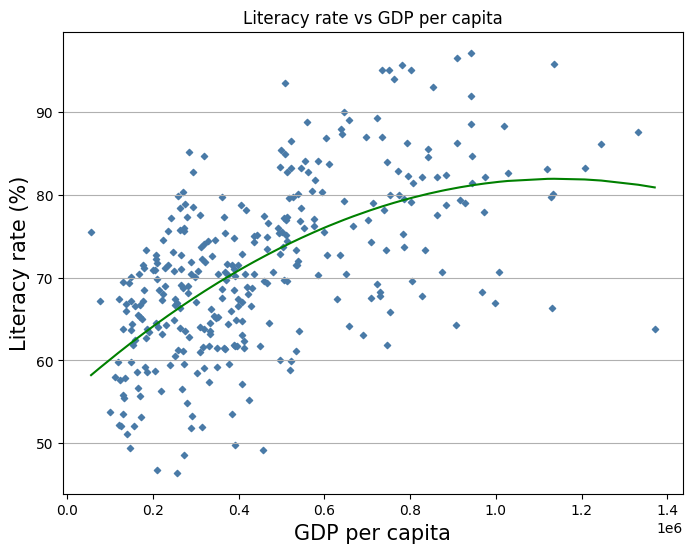

In [361]:
# literacy rate vs GDP per capita
district_info = district_info.sort_values('GDP per capita', ascending=True).reset_index().drop('index' , axis = 1)
plt.figure(figsize=(8,6))
plt.xlabel('GDP per capita' , size = 15)
plt.title('Literacy rate vs GDP per capita')
plt.ylabel('Literacy rate (%)' , size = 15)
plt.yticks([40,50,60,70,80,90,100])
plt.grid(axis='y')
plt.scatter(district_info[district_info['GDP per capita'] < 0.014]['GDP per capita']*100000000 , 
            district_info[district_info['GDP per capita'] < 0.014]['Literacy rate'],
            color = "#497AA7",
            marker = 'D',
            s = 10)

pfit = np.poly1d(np.polyfit(district_info[district_info['GDP per capita'] < 0.014]['GDP per capita']*100000000,
                            district_info[district_info['GDP per capita'] < 0.014]['Literacy rate'],
                             2))

plt.plot(district_info[district_info['GDP per capita'] < 0.014]['GDP per capita']*100000000, 
        pfit(district_info[district_info['GDP per capita'] < 0.014]['GDP per capita']*100000000), 
        color='green')

district_info['Literacy rate'].corr(district_info['GDP per capita'])





## <center> A positive correlation coeffecient between literacy rate and GDP per capita : <font color = 'green'>0.331 </font> </center>

-0.5945632234166605

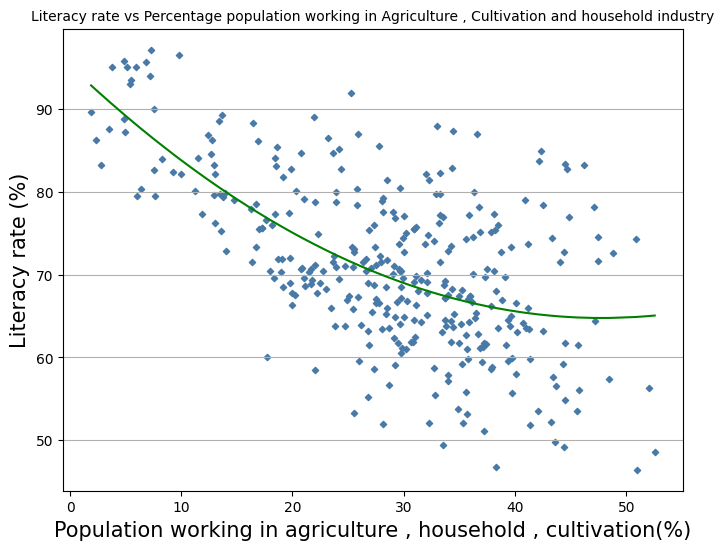

In [362]:
district_info = district_info.sort_values('Workers in Agr,Cul,Household', ascending=False).reset_index().drop('index' , axis = 1)

plt.figure(figsize=(8,6))
plt.xlabel('Population working in agriculture , household , cultivation(%)'  , size = 15)
plt.title('Literacy rate vs Percentage population working in Agriculture , Cultivation and household industry' , size = 10)
plt.ylabel('Literacy rate (%)' , size = 15)
plt.yticks([40,50,60,70,80,90,100])
plt.grid(axis='y')
plt.scatter(district_info['Workers in Agr,Cul,Household'],
            district_info['Literacy rate'],
            color = "#497AA7",
            marker = 'D',
            s = 10)

pfit = np.poly1d(np.polyfit(district_info['Workers in Agr,Cul,Household'],
                            district_info['Literacy rate'],
                             2))

plt.plot(district_info['Workers in Agr,Cul,Household'], 
        pfit(district_info['Workers in Agr,Cul,Household']), 
        color='green')


district_info['Literacy rate'].corr(district_info['Workers in Agr,Cul,Household'])


## <center> A strong negative correlation coeffecient between literacy rate and agriculture , household and cultivation industry workers: <font color = 'red'>-0.59 </font> </center>

0.16155311690944915

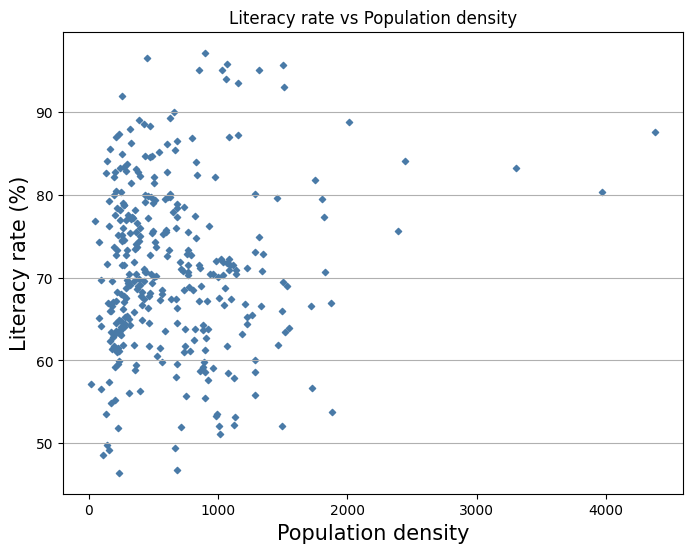

In [363]:


plt.figure(figsize=(8,6))
plt.xlabel('Population density' , size = 15)
plt.title('Literacy rate vs Population density')
plt.ylabel('Literacy rate (%)' , size = 15)
plt.yticks([40,50,60,70,80,90,100])
plt.grid(axis='y')
plt.scatter(district_info[district_info['Population density (/km2)'] < 5000]['Population density (/km2)'],
            district_info[district_info['Population density (/km2)'] < 5000]['Literacy rate'],
            color = "#497AA7",
            marker = 'D',
            s = 10)


district_info['Literacy rate'].corr(district_info['Population density (/km2)'])


## <center> A weak positive correlation coeffecient between literacy rate and population density : <font color = 'yellow'>0.161 </font> </center>

0.2649500752125803

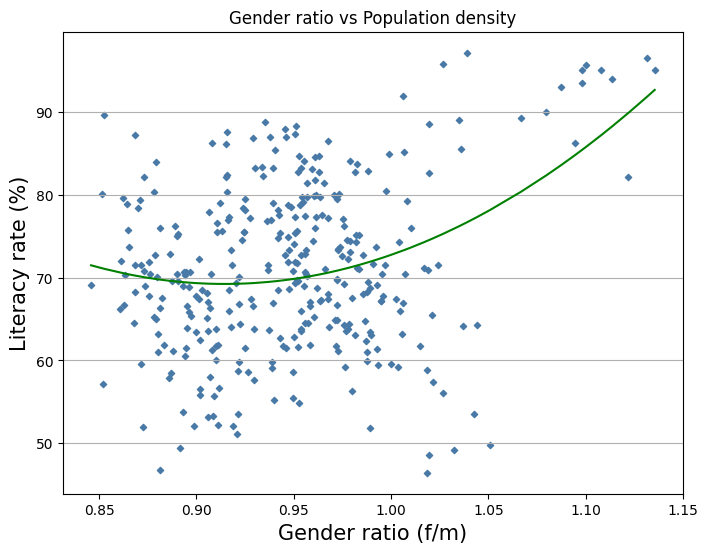

In [364]:
district_info = district_info.sort_values('Gender ratio (f/m)', ascending=True).reset_index().drop('index' , axis = 1)
plt.figure(figsize=(8,6))
plt.xlabel('Gender ratio (f/m)' , size = 15)
plt.title('Gender ratio vs Population density')
plt.ylabel('Literacy rate (%)' , size = 15)
plt.yticks([40,50,60,70,80,90,100])
plt.grid(axis='y')
plt.scatter(district_info['Gender ratio (f/m)'],
            district_info['Literacy rate'],
            color = "#497AA7",
            marker = 'D',
            s = 10)
pfit = np.poly1d(np.polyfit(district_info['Gender ratio (f/m)'],
                            district_info['Literacy rate'],
                             2))

plt.plot(district_info['Gender ratio (f/m)'], 
        pfit(district_info['Gender ratio (f/m)']), 
        color='green')

district_info['Literacy rate'].corr(district_info['Gender ratio (f/m)'])


## <center> A positive correlation coeffecient between literacy rate and gender ratio (f/m) : <font color = 'green'>0.264 </font> </center>

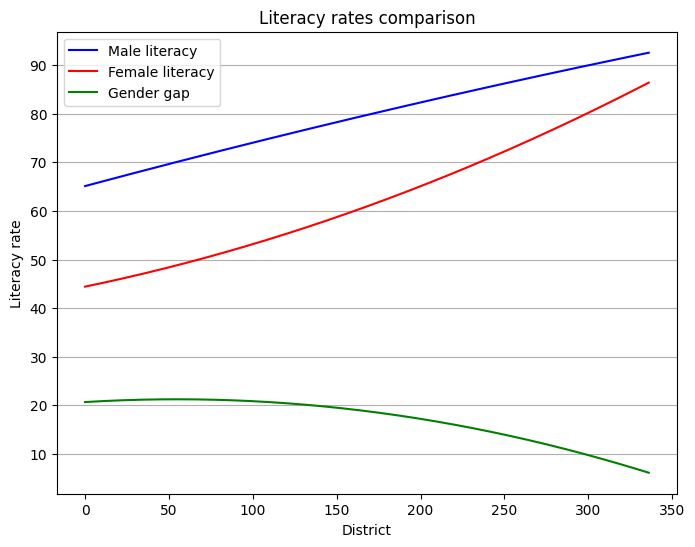

In [366]:
district_info = district_info.sort_values('Literacy rate', ascending=True).reset_index().drop('index' , axis = 1)

plt.figure(figsize = (8,6))
plt.grid(axis = 'y')
plt.title('Literacy rates comparison')

plt.ylabel('Literacy rate')
plt.xlabel('District')
plt.yticks(np.linspace(0,100,11,endpoint=True))

pfit = np.poly1d(np.polyfit(np.linspace(0,336,337,endpoint=True),
                            district_info['Male literacy'],
                             2))
plt.plot(np.linspace(0,336,337,endpoint=True), 
        pfit(np.linspace(0,336,337,endpoint=True)), 
        color='blue' , label = 'Male literacy')


pfit = np.poly1d(np.polyfit(np.linspace(0,336,337,endpoint=True),
                            district_info['Female literacy'],
                             2))
plt.plot(np.linspace(0,336,337,endpoint=True), 
        pfit(np.linspace(0,336,337,endpoint=True)), 
        color='red' , label = 'Female literacy')

pfit = np.poly1d(np.polyfit(np.linspace(0,336,337,endpoint=True),
                            district_info['Gender gap'],
                             2))
plt.plot(np.linspace(0,336,337,endpoint=True), 
        pfit(np.linspace(0,336,337,endpoint=True)), 
        color='green' , label = 'Gender gap')

plt.legend()

In [367]:
### No longer used because to save computation time,rather just imported it in a csv file and read it back, on the block where I import district data


#district_info['Confirmed cases'] = ''



#pd.options.mode.chained_assignment = None  # default='warn'
#district_covid = pd.read_csv('district_wise.csv')
#district_covid.drop(['State_Code','State','SlNo' , 'Migrated_Other' , 'Delta_Confirmed' , 'Delta_Active' , 'Delta_Recovered' , 'District_Notes' , 'District_Key' , 'Delta_Deceased' , 'Last_Updated'] ,axis = 1,  inplace = True)
#district_covid['District'] = district_covid['District'].str.upper()

#for district in district_covid['District']:
#    if district in list(district_info['District']):
#
#        ind = district_info[district_info['District'] == district].index
#
        
#        district_info['Confirmed cases'][ind] = district_covid[district_covid['District'] == district]['Confirmed']




